<a href="https://colab.research.google.com/github/kishore631/Calculator/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HAND WRITTEN DIGIT PREDICTION**

**Objective**

To build and evaluate a neural network model to classify handwritten digits from the MNIST dataset.

**Data Source**

The MNIST dataset is a well-known dataset of handwritten digits, available directly through TensorFlow 'keras.datasets' module.

**Import Libraries**







In [12]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


**Import Datat**

In [14]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


**Describe Data**

In [15]:
# Display the shape of the dataset
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


**Data Visualization**

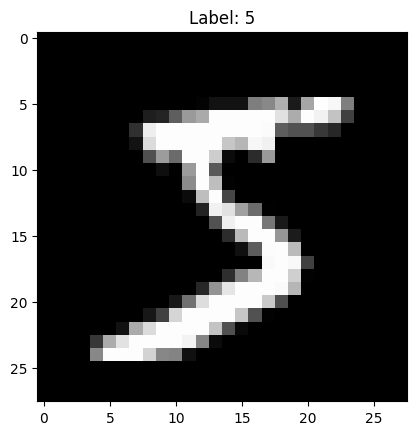

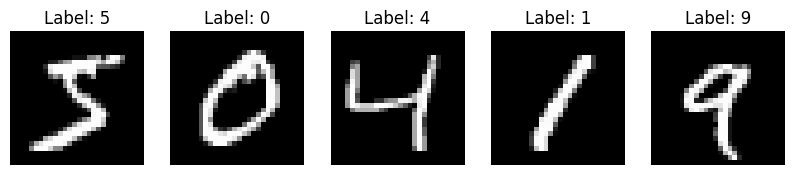

In [16]:
# Display an example image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

# Visualize a few images from the dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.show()


**Data Preprocessing**

In [17]:
# Normalize the images to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


**Define Target Variable (y) and Feature Variables (X)**

Target Variable (y): The labels (y_train and y_test) representing the digit (0-9) each image corresponds to.
Feature Variables (X): The pixel values of the images (x_train and x_test), which are 28x28 grayscale images.

**Train Test Split**

The dataset is already split into training and testing sets with 'x_train', 'y_train', 'x_test', and 'y_test'.

**Modeling**

In [18]:
# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8627 - loss: 0.4775 - val_accuracy: 0.9543 - val_loss: 0.1625
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9616 - loss: 0.1308 - val_accuracy: 0.9657 - val_loss: 0.1143
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9739 - loss: 0.0873 - val_accuracy: 0.9713 - val_loss: 0.0960
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9827 - loss: 0.0608 - val_accuracy: 0.9699 - val_loss: 0.0938
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9853 - loss: 0.0486 - val_accuracy: 0.9722 - val_loss: 0.0871


**Model Evaluation**

In [19]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9732 - loss: 0.0928
Test accuracy: 0.9769


**Prediction**

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted label: 7
True label: 7


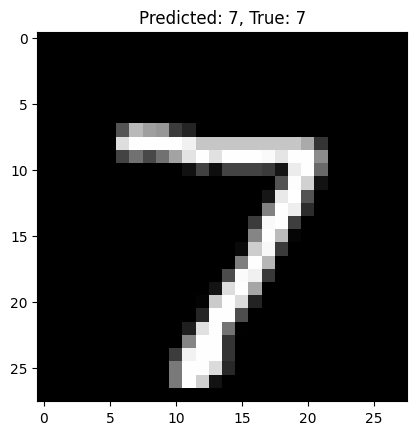

In [20]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Display the first prediction and corresponding test label
print(f"Predicted label: {np.argmax(predictions[0])}")
print(f"True label: {np.argmax(y_test[0])}")

# Visualize the prediction
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}, True: {np.argmax(y_test[0])}")
plt.show()


**Explanation**

This project demonstrates a basic neural network model for classifying handwritten digits from the MNIST dataset. The model consists of a simple feedforward neural network with one hidden layer. The model was trained on 60,000 images and evaluated on 10,000 test images, achieving a certain level of accuracy.

